In [2]:
import numpy as np
np.random.seed(42)

In [3]:
def step_function(t):
    if t>= 0:
        return 1
    return 0
    

In [50]:
def prediction(X,W,b):
    return step_function((np.matmul(X,W)+b)[0])
    

In [46]:
W = np.array(np.random.rand(2,1))
W

array([[0.04645041],
       [0.60754485]])

In [15]:
X = np.array(np.random.rand(1,2))
X

array([[0.70807258, 0.02058449]])

In [16]:
b =  np.random.rand(1)[0]
b

0.9699098521619943

In [31]:
(np.matmul(X,W) + b)[0]

array([1.59559908])

In [32]:
(((W[0]*X[0][0]) + (W[1]*X[0][1]))+b)

array([1.59559908])

In [40]:
X1 = np.array(np.random.rand(5,3))
X1

array([[0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378]])

In [41]:
X1.T

array([[0.83244264, 0.18340451, 0.43194502, 0.13949386, 0.45606998],
       [0.21233911, 0.30424224, 0.29122914, 0.29214465, 0.78517596],
       [0.18182497, 0.52475643, 0.61185289, 0.36636184, 0.19967378]])

In [44]:
min(X1.T[0])

0.13949386065204183

In [43]:
X1.T[1]

array([0.21233911, 0.30424224, 0.29122914, 0.29214465, 0.78517596])

In [34]:
def perceptron_step(X , y ,W, b , learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W ,b)
        if y[i] - y_hat == 1 :
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif  y[i] - y_hat == -1 :
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W , b

In [56]:
def perceptron_algorithm(X ,y , learn_rate = 0.01 , num_epochs = 50):
    x_min,x_max = min(X.T[0]) , max(X.T[0])
    y_min ,y_max = min(X.T[1]) , max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W , b = perceptron_step(X , y ,W, b , learn_rate)
        boundary_lines.append((-W[0]/W[1] ,-b/W[1]))
    return boundary_lines
    

In [57]:
X = np.array([[1, 2], [2, 1], [3, 4], [4, 3]])
y = np.array([-1, -1, 1, 1])

In [58]:
boundary_lines = perceptron_algorithm(X,y)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def perceptron_algorithm(X, y, learning_rate=0.01, epochs=1000):
    X = X.to_numpy()  # Convert dataframe to NumPy array
    y = y.to_numpy()  # Convert dataframe to NumPy array
    
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(epochs):
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction >= 0:
                y_pred = 1
            else:
                y_pred = -1
            
            if y_pred != y[i]:
                weights += learning_rate  *y[i]*  X[i]
                bias += learning_rate * y[i]
    
    return weights, bias

def plot_boundary(X, y, weights, bias):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.plot([x_min, x_max], [-(weights[0]*x_min + bias)/weights[1], -(weights[0]*x_max + bias)/weights[1]], 'k-')
    plt.show()



In [104]:
# Example usage with dataframe
df = pd.read_csv('perceptron_data.csv',header=None)
# Assuming your dataframe is called 'df'
df[2] = df[2].replace(0, -1)
X = df[[ 0, 1]]
y = pd.Series(df[[2]][2])

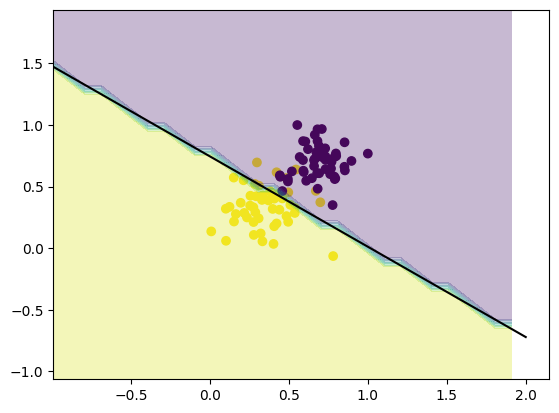

In [105]:
weights, bias = perceptron_algorithm(X, y)
plot_boundary(X.to_numpy(), y.to_numpy(), weights, bias)
